## Problem Statement 
 1. Which Team has won Highest Game ?
 2. Which city is famous for Match ?
 3. Relation between Decision after winning toss ?
 4. Relation between winning toss and winning game?
 5. Most Favourable Umpires?
 6. Player with higest Man of the match?


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('IPL Matches 2008-2020.csv')
data.sample(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
583,1082597,Mumbai,2017-04-09,N Rana,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,4.0,N,NaN,Nitin Menon,CK Nandan
677,1136602,Delhi,2018-05-10,S Dhawan,Feroz Shah Kotla,0,Delhi Daredevils,Sunrisers Hyderabad,Delhi Daredevils,bat,Sunrisers Hyderabad,wickets,9.0,N,NaN,AY Dandekar,C Shamshuddin
347,598023,Bangalore,2013-04-20,R Vinay Kumar,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,C Shamshuddin
190,501213,Mumbai,2011-04-17,Yuvraj Singh,Dr DY Patil Sports Academy,0,Pune Warriors,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,wickets,3.0,N,NaN,Asad Rauf,AM Saheba
65,392189,Durban,2009-04-23,AB de Villiers,Kingsmead,1,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,bat,Delhi Daredevils,runs,9.0,N,NaN,BR Doctrove,SJA Taufel


## Data Cleaning 


Here we see that we dont need column named method.

In [4]:
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [5]:
data.drop('method',axis = 1 , inplace = True)

1.Team with high game winning

In [6]:
match_won = pd.DataFrame({
    'Winner':data['winner']
})
match_won.sample(10)

,Winner
569,Rising Pune Supergiants
136,Kolkata Knight Riders
86,Delhi Daredevils
106,Kolkata Knight Riders
718,Chennai Super Kings
21,Kings XI Punjab
538,Rising Pune Supergiants
201,Rajasthan Royals
660,Sunrisers Hyderabad
525,Gujarat Lions


In [7]:
counts_wins = match_won.value_counts()
counts_wins

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64

Rising Pune Supergiants and Rising Pune Supergiant are same so conducting some data analysis

In [8]:
data['team1'] = data['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['team2'] = data['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['toss_winner'] = data['toss_winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
data['winner'] = data['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [9]:
match_won = pd.DataFrame({
    'Winner':data['winner']
})
counts_wins = match_won.value_counts()
counts_wins


Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
dtype: int64

In [10]:
label = [X[0] for X in counts_wins.keys()]
label

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Pune Warriors',
 'Kochi Tuskers Kerala']

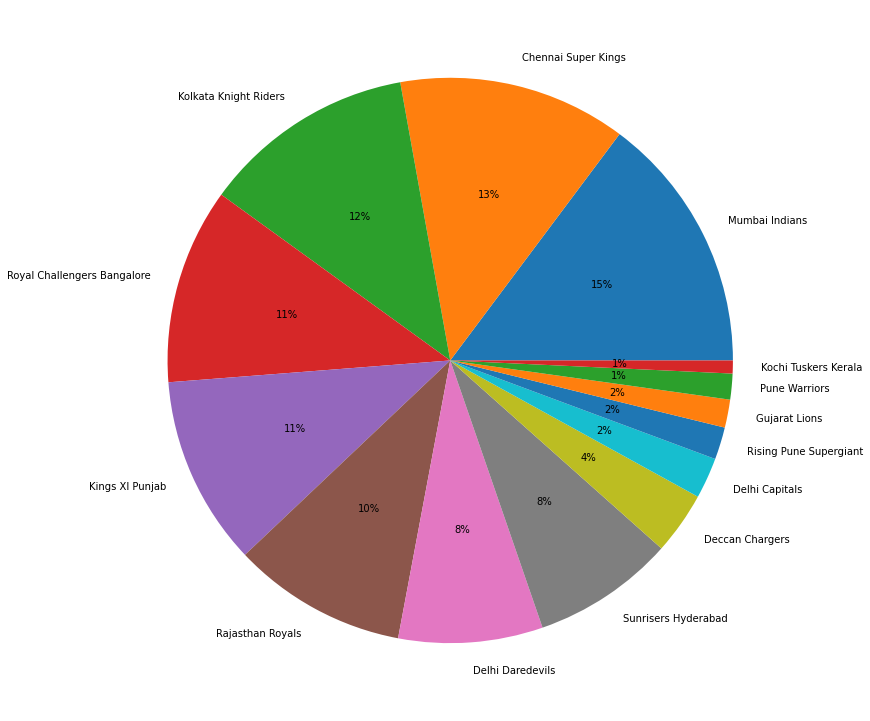

In [11]:
bar , ax = plt.subplots(figsize = (20,13))
ax = plt.pie(x = counts_wins,autopct="%.f%%",labels = label)

Lets see the Features of the important columns in our data set 

In [12]:
for features in ['result','eliminator','toss_decision','neutral_venue']:
   print(features,data[features].unique())

result ['runs' 'wickets' 'tie' nan]
eliminator ['N' 'Y' nan]
toss_decision ['field' 'bat']
neutral_venue [0 1]


Lets see the number of match won in case of Elimination

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


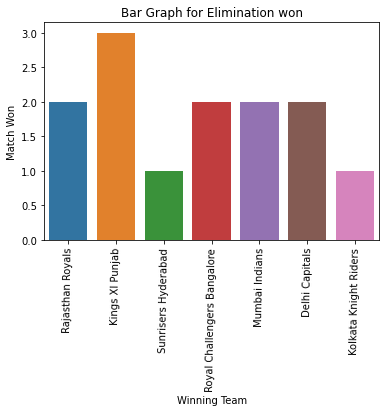

In [13]:
sns.countplot(data['winner'][data['eliminator']=="Y"],data = data,orient='h')
plt.xticks(rotation = 89)
plt.xlabel("Winning Team")
plt.ylabel("Match Won")
plt.title("Bar Graph for Elimination won",fontsize = 12)
plt.show()

Team which has won many match by Run in IPL

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


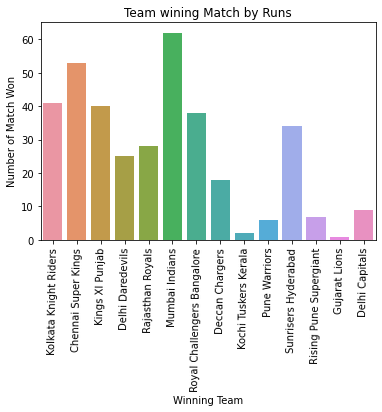

In [14]:
sns.countplot(data['winner'][data['result']=="runs"],data = data)
plt.xticks(rotation = 89)
plt.xlabel("Winning Team")
plt.ylabel("Number of Match Won")
plt.title("Team wining Match by Runs",fontsize = 12)
plt.show()

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


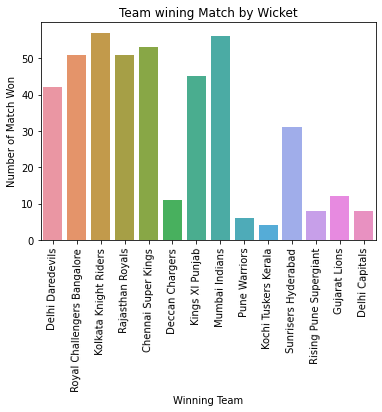

In [29]:
sns.countplot(data['winner'][data['result']=='wickets'],data = data)
plt.xticks(rotation = 89)
plt.xlabel("Winning Team")
plt.ylabel("Number of Match Won")
plt.title("Team wining Match by Wicket",fontsize = 12)
plt.show()

In Ordered Format 

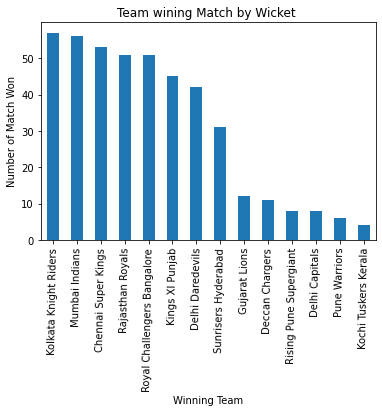

In [15]:
data['winner'][data['result']=='wickets'].value_counts().plot(kind="bar")
plt.xticks(rotation = 89)
plt.xlabel("Winning Team")
plt.ylabel("Number of Match Won")
plt.title("Team wining Match by Wicket ")
plt.show()

Which team has much tie games?

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


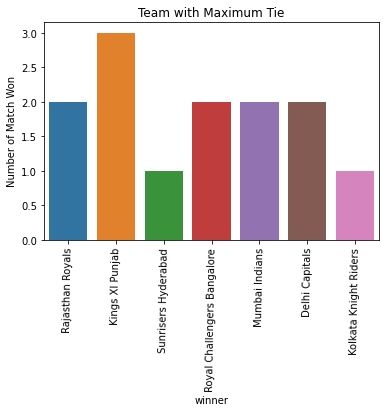

In [16]:
sns.countplot(data['winner'][data['result']=='tie'],data = data)
plt.xticks(rotation = 89)
 
plt.ylabel("Number of Match Won")
plt.title("Team with Maximum Tie",fontsize = 12)
plt.show()

What to choose after winning the TOSS ?

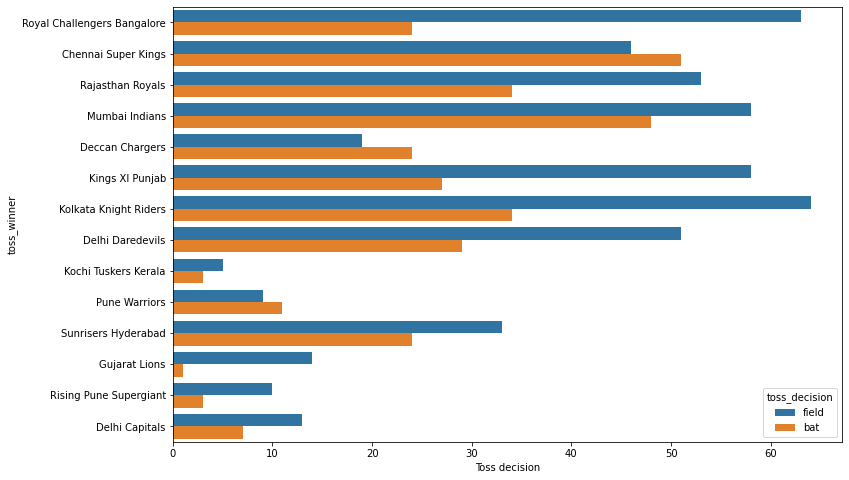

In [17]:
 plt.figure(figsize=(12,8))
ax=sns.countplot(y="toss_winner", data=data,orient="h",hue="toss_decision")
plt.xlabel("Toss decision")
plt.show()

Percentage of Team winning the game based on their Decision after winning the toss

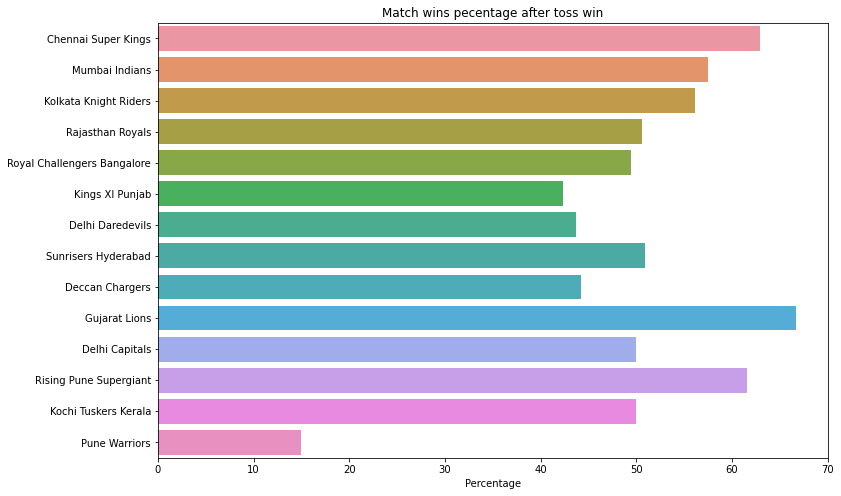

In [18]:
toss_winner = data["toss_winner"].value_counts()
winner_toss_df = data[data["toss_winner"]==data["winner"]]
winner_count_after_toss_win = winner_toss_df["winner"].value_counts()
both_win_dict = dict()
for items in winner_count_after_toss_win.iteritems():
    both_win_dict[items[0]] = float(items[1])/toss_winner[items[0]] * 100
plt.figure(figsize=(12,8))
sns.barplot(y=list(both_win_dict.keys()), x=list(both_win_dict.values()), orient="h")
plt.title("Match wins pecentage after toss win")
plt.xlabel("Percentage")
plt.show()

Famous Venue where most of the matches are conducted

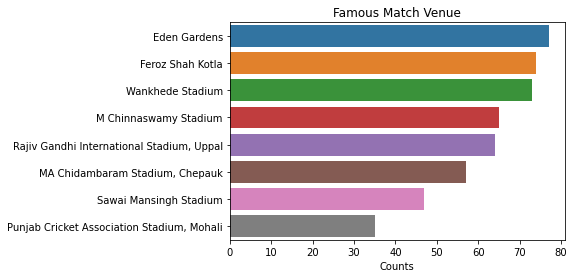

In [19]:
sns.barplot(x = data['venue'].value_counts().head(8).values,
            y = data['venue'].value_counts().head(8).index,
            data = data)

plt.title("Famous Match Venue")
plt.xlabel('Counts')
plt.show()

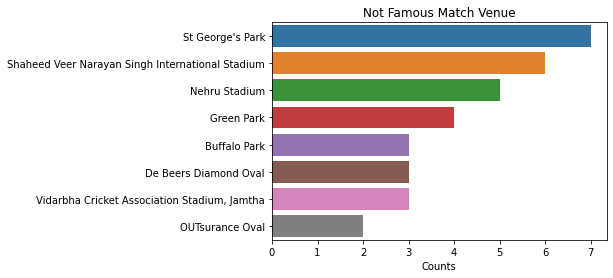

In [35]:
sns.barplot(x = data['venue'].value_counts().tail(8).values,
            y = data['venue'].value_counts().tail(8).index,
            data = data)

plt.title("Not Famous Match Venue")
plt.xlabel('Counts')
plt.show()

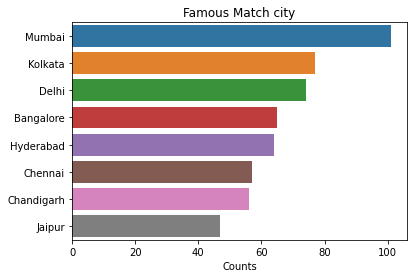

In [20]:
sns.barplot(x = data['city'].value_counts().head(8).values,
            y = data['city'].value_counts().head(8).index,
            data = data)

plt.title("Famous Match city")
plt.xlabel('Counts')
plt.show()

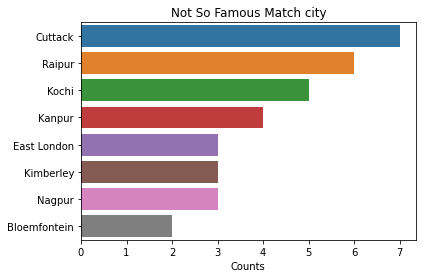

In [37]:
sns.barplot(x = data['city'].value_counts().tail(8).values,
            y = data['city'].value_counts().tail(8).index,
            data = data)

plt.title("Not So Famous Match city")
plt.xlabel('Counts')
plt.show()

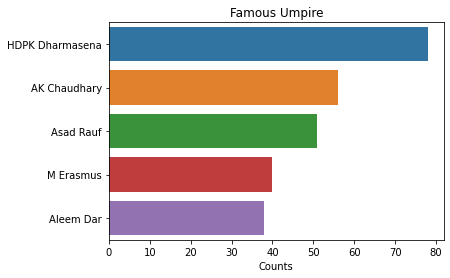

In [21]:
sns.barplot(x = data['umpire1'].value_counts().head(5).values,
            y = data['umpire1'].value_counts().head(5).index,
            data = data)

plt.title("Famous Umpire")
plt.xlabel('Counts')
plt.show()

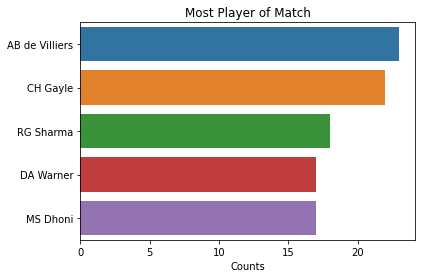

In [22]:
sns.barplot(x = data['player_of_match'].value_counts().head(5).values,
            y = data['player_of_match'].value_counts().head(5).index,
            data = data)

plt.title("Most Player of Match")
plt.xlabel('Counts')
plt.show()

C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


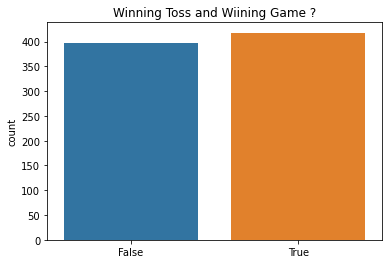

In [24]:
insights = data['toss_winner'] == data['winner']
sns.countplot(insights)
plt.title("Winning Toss and Wiining Game ?")
plt.show()